# Determination of the expected displacement [nm]
### Johanna Rahm, Sebastian Malkusch
#### Research group Heilemann
#### Institute for Physical and Theoretical Chemistry, Goethe University Frankfurt a.M.
The expected displacement of a particle per frame in x/y [nm] is estimated by the average. This values affects how swift connects localizations, as it can be sensible to prefer longer connections over shorter ones if the expected displacement is large. <br/> 
swift --out_values: mjd, mjd_n

## Choose a localization software

Make sure that the localization results are in [nm].

In [1]:
from pySPT.widgets import widgetExpDisp
from pySPT.widgets import widgetDirectoryStructure
from pySPT.widgets import widgetColumnSort
from pySPT.preAnalysis import expDisplacement
widget_exp_disp = widgetExpDisp.WidgetExpDisp()
display(widget_exp_disp.software_button)

RadioButtons(options=('ThunderSTORM', 'rapidSTORM'), value='ThunderSTORM')

## Load file
thunderSTORM: Insert the full file path of the tracked seg file with .csv ending or browse for it. (Example path: F:\resting\160404_CS5\cell05.tracked.csv) <br/>
rapidSTORM: Insert the full file path of the tracked seg file with .txt ending or browse for it. (Example path: F:\resting\160404_CS5\cell05.tracked.txt)

In [2]:
exp_displacement = expDisplacement.ExpDisplacement()
widget_dir_structure = widgetDirectoryStructure.WidgetDirStructure()
display(widget_exp_disp.file_text_box, widget_exp_disp.file_button)
widget_exp_disp.file_button.on_click(widget_exp_disp.open_file)
widget_exp_disp.file_text_box.observe(widget_exp_disp.change_file_box)

Text(value='', description='Complete path', placeholder='insert path', style=DescriptionStyle(description_widt…

Button(description='browse', style=ButtonStyle(), tooltip='browse for file')

## Run analysis

Button(description='run', style=ButtonStyle(), tooltip='run the analysis')

widget_column_sort.column_order {18: '"seg.mjd"', 20: '"seg.mjd_n"', 24: '"seg.id"'}
The expected displacement is 53.306 nm.
The max mean jump distance is 1037.385 nm.


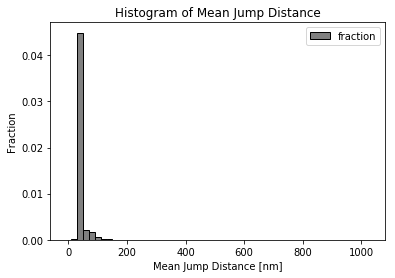

In [3]:
display(widget_exp_disp.run_button)
def run_analysis(event):
    widget_exp_disp.create_clear_output()
    display(widget_exp_disp.run_button)
    if widget_exp_disp.is_file(widget_exp_disp.file_text_box.value):
        widget_column_sort = widgetColumnSort.WidgetColumnSort(widget_exp_disp.file_text_box.value, widget_exp_disp.software_button.value, [('"seg.id"',), ('"seg.mjd"',), ('"seg.mjd_n"',)])
        widget_column_sort.check_header()
        if widget_column_sort.correct_header:
            widget_column_sort.run_column_sort()
            exp_displacement.file_name = widget_exp_disp.file_text_box.value
            exp_displacement.software = widget_exp_disp.software_button.value
            exp_displacement.column_order = widget_column_sort.column_order
            exp_displacement.run_exp_displacement()
        else:
            widget_exp_disp.warning_wrong_file()
    else:
        widget_exp_disp.warning_wrong_file_path()
widget_exp_disp.run_button.on_click(run_analysis)

## Save analysis
The results will be saved in a .txt file with the expected displacement, maximum displacement & histogram informations (columns: mjd [nm], fraction). Optionally the histogram plot can be saved as .pdf.

In [4]:
display(widget_exp_disp.save_fig_checkbox, widget_exp_disp.save_button)
def save_analysis(event):
    widget_exp_disp.create_clear_output()
    display(widget_exp_disp.save_fig_checkbox, widget_exp_disp.save_button)
    widget_dir_structure.name_handling(widget_exp_disp.file_text_box.value)
    widget_dir_structure.create_raw_base_name()
    widget_dir_structure.sub_folder = "\\preAnalysis"
    widget_dir_structure.create_folder()
    exp_displacement.save_exp_displacement(widget_dir_structure.sub_folder_dir, widget_dir_structure.raw_base_name, widget_exp_disp.save_fig_checkbox.value)
widget_exp_disp.save_button.on_click(save_analysis)

Checkbox(value=True, description='Save plot')

Button(description='save', style=ButtonStyle(), tooltip='save the results')